# Data Cleansing

In [473]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [474]:
#Load data
dataset = pd.read_csv("Data/Churn.csv", sep=";")
#preview
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Female,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Female,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Female,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Female,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Female,43,2,12551082,1,1,1,790841.0,0


In [475]:
# dataset size
dataset.shape

(999, 12)

In [476]:
#The First problem is on the column name
dataset.columns = ["Id","Score","State","Gender","Age","Patrimony","Balance","Products","HaveCreditCard",
                    "Asset","Salary","Left"]

In [477]:
#preview
dataset.head()

,Id,Score,State,Gender,Age,Patrimony,Balance,Products,HaveCreditCard,Asset,Salary,Left
0,1,619,RS,Female,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Female,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Female,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Female,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Female,43,2,12551082,1,1,1,790841.0,0


In [478]:
#Explore data category.
#state
group = dataset.groupby(['State']).size()
group

State
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='State'>

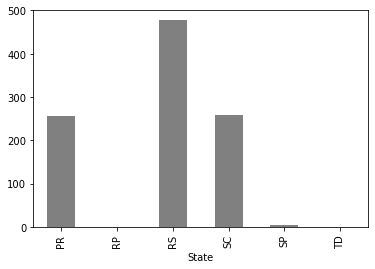

In [479]:
group.plot.bar(color = 'gray')

In [480]:
# Gener
group = dataset.groupby(['Gender']).size()
group

Gender
F           2
Fem         1
Female    461
M           6
Male      521
dtype: int64

<AxesSubplot:xlabel='Gender'>

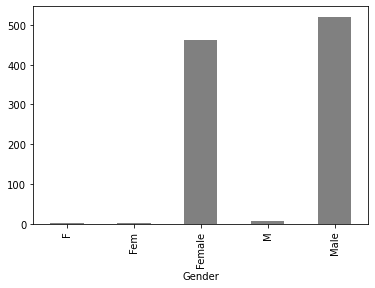

In [481]:
group.plot.bar(color = 'gray')

In [482]:
#Explore the numeric columns 
#score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

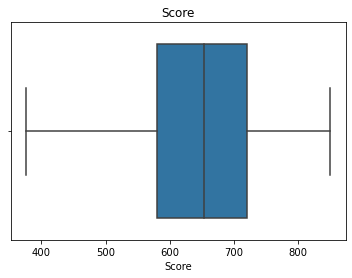

In [483]:
srn.boxplot(x=dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

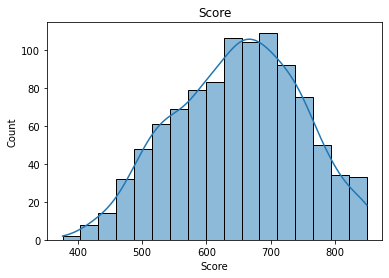

In [484]:
srn.histplot(dataset['Score'], kde=True).set_title('Score')

In [485]:
#Age
dataset['Age'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age')

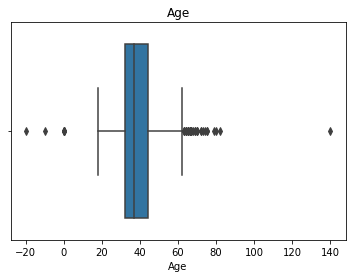

In [486]:
srn.boxplot(x=dataset['Age']).set_title('Age')

Text(0.5, 1.0, 'Age')

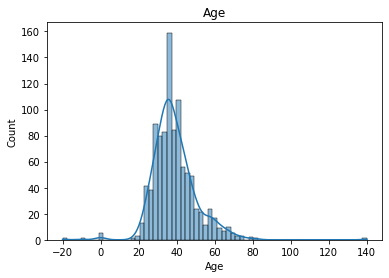

In [487]:
srn.histplot(dataset['Age'], kde=True).set_title('Age')

In [488]:
#Asset
dataset['Asset'].describe()

count    999.00000
mean       0.50951
std        0.50016
min        0.00000
25%        0.00000
50%        1.00000
75%        1.00000
max        1.00000
Name: Asset, dtype: float64

Text(0.5, 1.0, 'Asset')

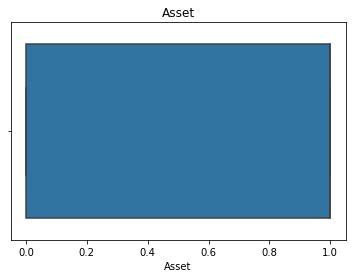

In [489]:
srn.boxplot(x=dataset['Asset']).set_title('Asset')

<AxesSubplot:xlabel='Asset', ylabel='Count'>

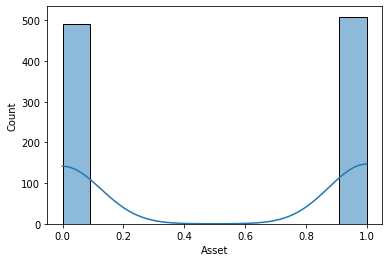

In [490]:
srn.histplot(dataset['Asset'], kde=True)

In [491]:
#Salary
dataset['Salary'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salary, dtype: float64

Text(0.5, 1.0, 'Salary')

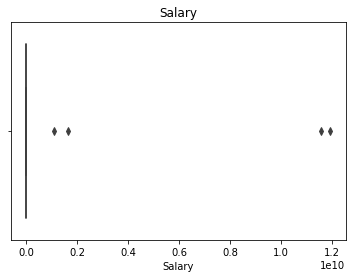

In [492]:
srn.boxplot(x=dataset['Salary']).set_title('Salary')

Text(0.5, 1.0, 'Salary')

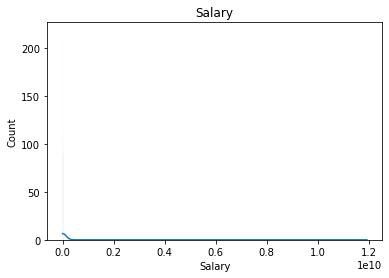

In [493]:
srn.histplot(dataset['Salary'],kde=True).set_title('Salary')

In [494]:
#Count value NAN
#Gender and Salary
dataset.isnull().sum()

Id                0
Score             0
State             0
Gender            8
Age               0
Patrimony         0
Balance           0
Products          0
HaveCreditCard    0
Asset             0
Salary            7
Left              0
dtype: int64

In [495]:
#Salaries
#Remove and replace for median
dataset['Salary'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salary, dtype: float64

In [496]:
median = sts.median(dataset['Salary'])
median

70518.0

In [497]:
#To replace NAN for median
dataset['Salary'].fillna(median, inplace=True)

In [498]:
#Verify if NAN don't exist
dataset['Salary'].isnull().sum()

0

In [499]:
#total of NaNs
dataset['Gender'].isnull().sum()

8

In [500]:
#FullFill NANs with Male(trend)
dataset['Gender'].fillna('Male', inplace=True)

In [501]:
#Verify again NANs
dataset['Gender'].isnull().sum()

0

In [502]:
#Domain Standarizer 
dataset.loc[dataset['Gender'] ==  'M', 'Gender'] = "Male"
dataset.loc[dataset['Gender'].isin( ['Fem','F']), 'Gender'] = "Female"
#preview the result
agrupado = dataset.groupby(['Gender']).size()
agrupado

Gender
Female    464
Male      535
dtype: int64

In [503]:
#Ages for domain
dataset['Age'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Age, dtype: float64

In [504]:
#preview 
dataset.loc[(dataset['Age'] <  0 )  | ( dataset['Age'] >  120) ]

,Id,Score,State,Gender,Age,Patrimony,Balance,Products,HaveCreditCard,Asset,Salary,Left
867,869,636,RS,Female,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Male,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Male,140,5,93147,2,1,0,6621413.0,0


In [505]:
#Calc the median
median = sts.median(dataset['Age'])
median

37

In [506]:
#Replace
dataset.loc[(dataset['Age'] <  0 )  | ( dataset['Age'] >  120), 'Age'] = median

In [507]:
#Verify if exists age out of domain
dataset.loc[(dataset['Age'] <  0 )  | ( dataset['Age'] >  120) ]

,Id,Score,State,Gender,Age,Patrimony,Balance,Products,HaveCreditCard,Asset,Salary,Left


In [508]:
#Duplicate data, find by Id
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,State,Gender,Age,Patrimony,Balance,Products,HaveCreditCard,Asset,Salary,Left
80,81,665,RS,Female,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Female,34,1,9664554,2,0,0,17141366.0,0


In [509]:
#Exclude for ID
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)
#Find duplicate data
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,State,Gender,Age,Patrimony,Balance,Products,HaveCreditCard,Asset,Salary,Left


In [510]:
#State out of domain
group = dataset.groupby(['State']).size()
group

State
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [511]:
#Attr RS (trend)
dataset.loc[dataset['State'].isin( ['RP','SP','TD']), 'State'] = "RS"


In [512]:
#Verify the result
group = dataset.groupby(['State']).size()
group

State
PR    257
RS    483
SC    258
dtype: int64

In [513]:
#outliers on salary, let's consider 2 standard deviations
dev = sts.stdev(dataset['Salary'])
dev

528988918.4679201

In [514]:
#Standard deviations with great then 2 standard deviations.
dataset.loc[dataset['Salary'] >=  2 * dev ] 

,Id,Score,State,Gender,Age,Patrimony,Balance,Products,HaveCreditCard,Asset,Salary,Left
7,8,376,PR,Female,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Female,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Female,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Male,72,1,0,2,0,1,1.119812e+09,0


In [515]:
#let's calc the median Salary
median = sts.median(dataset['Salary'])
median

8637195.5

In [516]:
dataset.head()

,Id,Score,State,Gender,Age,Patrimony,Balance,Products,HaveCreditCard,Asset,Salary,Left
0,1,619,RS,Female,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Female,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Female,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Female,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Female,43,2,12551082,1,1,1,790841.0,0


In [517]:
dataset.shape

(998, 12)

# Another example: description.

### Load Data

In [518]:
dataset = pd.read_csv('Data/wheather.csv', sep=';')
dataset.head()

,Wheather,Temperature,Humidity,Wind,Play
0,sunny,85,85.0,False,No
1,sunny,80,90.0,True,No
2,cloudy,83,86.0,True,Yes
3,rainy,70,NaN,False,Yes
4,rainy,68,80.0,False,Yes


### Explore categorical data

In [519]:
#Wheather
group = dataset.groupby(['Wheather']).size()
group

Wheather
cloudy    3
minus     1
rainy     5
sunny     5
dtype: int64

<AxesSubplot:xlabel='Wheather'>

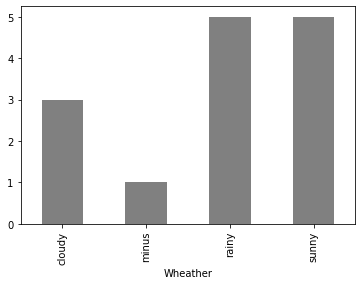

In [520]:
group.plot.bar(color = 'gray')

In [521]:
# Wind
group = dataset.groupby(['Wind']).size()
group

Wind
False    6
True     7
dtype: int64

<AxesSubplot:xlabel='Wind'>

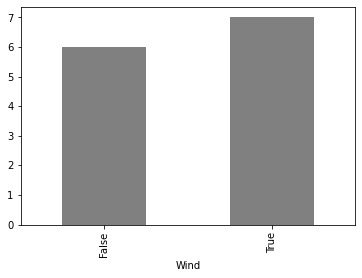

In [522]:
group.plot.bar(color = 'gray')

In [523]:
dataset.describe()

,Temperature,Humidity
count,14.000000,13.000000
mean,155.571429,89.769231
std,306.433759,34.540203
min,64.000000,65.000000
25%,69.250000,70.000000
50%,73.500000,85.000000
75%,80.750000,90.000000
max,1220.000000,200.000000


Text(0.5, 1.0, 'Temperature')

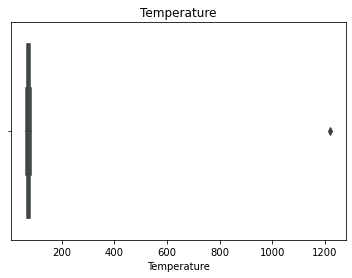

In [524]:
srn.boxplot(x=dataset['Temperature']).set_title('Temperature')

Text(0.5, 1.0, 'Temperature')

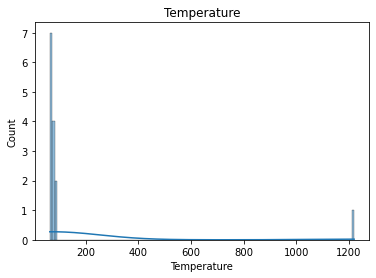

In [525]:
srn.histplot(dataset['Temperature'], kde=True).set_title('Temperature')

In [526]:
#outliers on Temperature, let's consider 2 standard deviations
dev = sts.stdev(dataset['Temperature'])
dev

306.433758505241

In [527]:
#Standard deviations with great then 2 standard deviations.
dataset.loc[dataset['Temperature'] >=  2 * dev ] 

,Wheather,Temperature,Humidity,Wind,Play
7,sunny,1220,95.0,False,No


In [528]:
#let's calc the median Salary
median = sts.median(dataset['Temperature'])
median

73.5

In [529]:
#Standard deviations with great then 2 standard deviations.
dataset.loc[dataset['Temperature'] >=  2 * dev, 'Temperature' ] = median

Text(0.5, 1.0, 'Temperature')

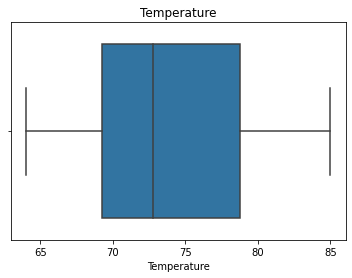

In [530]:
srn.boxplot(x=dataset['Temperature']).set_title('Temperature')

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

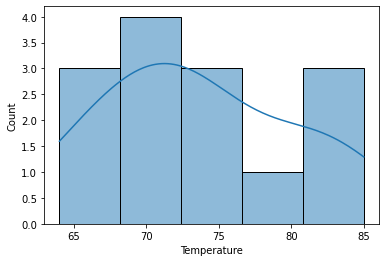

In [531]:
srn.histplot(dataset['Temperature'], kde=True)

In [532]:
group = dataset.groupby('Wheather').size()
group

Wheather
cloudy    3
minus     1
rainy     5
sunny     5
dtype: int64

<AxesSubplot:xlabel='Wheather'>

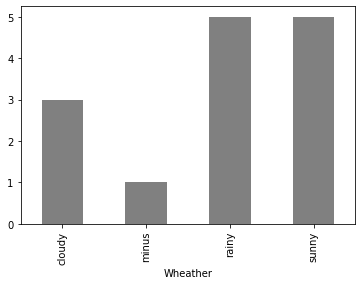

In [533]:
group.plot.bar(color='gray')


In [534]:
# minus don't exist
dataset.loc[dataset['Wheather']=='minus']='sunny'
group = dataset.groupby('Wheather').size()
group

Wheather
cloudy    3
rainy     5
sunny     6
dtype: int64

### Find the blanks and Nan values.

In [535]:
# Find the blancks and Nan values.
dataset.isnull().sum()

Wheather       0
Temperature    0
Humidity       1
Wind           1
Play           0
dtype: int64

In [536]:
#Calc the median
median = sts.median(dataset['Humidity'])
median

TypeError: '<' not supported between instances of 'str' and 'float'

In [ ]:
#To replace NAN for median
dataset['Humidity'].fillna(median, inplace=True)

In [ ]:
#Calc the median
median = sts.median(dataset['Wind'])
median

1.0

In [ ]:
#To replace NAN for median
dataset['Wind'].fillna(median, inplace=True)

In [ ]:
# Find the blancks and Nan values.
dataset.isnull().sum()

Wheather       0
Temperature    0
Humidity       0
Wind           0
Play           0
dtype: int64